# Image Compression with Singular Value Decomposition (SVD)
This notebook demonstrates image compression using SVD on a RGB image

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import resize


## Load and Prepare the Image

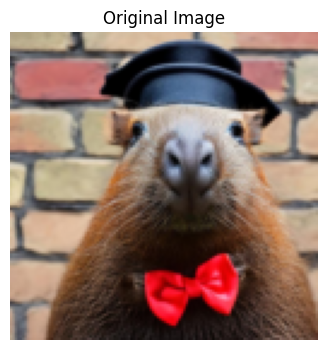

In [18]:
path = './capybara.jpg'
image = io.imread(path)
image = resize(image, (128, 128), anti_aliasing=True)
plt.figure(figsize=(4,4))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

## Apply SVD and Compress the Image

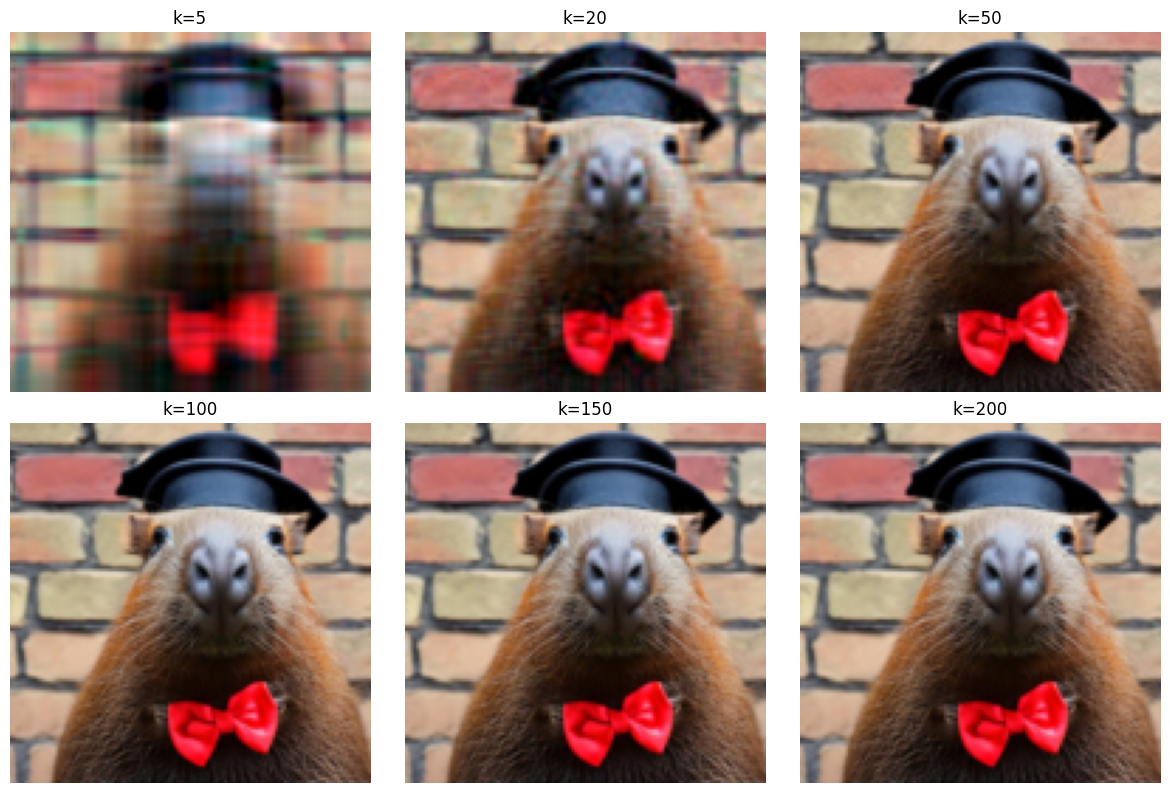

In [19]:
# Perform SVD on each color channel
U_r, S_r, VT_r = np.linalg.svd(image[:, :, 0], full_matrices=False)
U_g, S_g, VT_g = np.linalg.svd(image[:, :, 1], full_matrices=False)
U_b, S_b, VT_b = np.linalg.svd(image[:, :, 2], full_matrices=False)

# Function to reconstruct the image using k singular values
def reconstruct_image(k):
    r_channel = np.dot(U_r[:, :k], np.dot(np.diag(S_r[:k]), VT_r[:k, :]))
    g_channel = np.dot(U_g[:, :k], np.dot(np.diag(S_g[:k]), VT_g[:k, :]))
    b_channel = np.dot(U_b[:, :k], np.dot(np.diag(S_b[:k]), VT_b[:k, :]))
    reconstructed = np.stack((r_channel, g_channel, b_channel), axis=2)
    return np.clip(reconstructed, 0, 1)

# Plot the reconstructed images with different k values
fig , ax = plt.subplots(2, 3, figsize=(12, 8))
for i, k in enumerate([5, 20, 50, 100, 150, 200]):
    ax[i // 3, i % 3].imshow(reconstruct_image(k))
    ax[i // 3, i % 3].set_title(f'k={k}')
    ax[i // 3, i % 3].axis('off')
plt.tight_layout()
plt.show()


## Analysis and Discussion
I experiement using a range of k to test on the results of having different k for SVD. For k = 5, you can see that the image is unclear but you can somehow tell what it is. For k = 20, there are more details that you can see in the image. The results clearly shows that the higher the k is the better and more clear the image would be. The reason is simple, the more k means that the more components are been kept and thus remain most of the details of original image. However, in my example, when k is larger than 100, there is no significant difference between the images. Thus, picking a proper k for your task would be important, since you want to minimize the components that remains but not affect the quality of the image too much.